# Clustering K-means
#### UD3. Aprendizaxe non supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Aunque la mayoría de las aplicaciones de los algoritmos de aprendizaje automático en la actualidad se basan en el aprendizaje supervisado, la gran mayoría de los datos disponibles **no están etiquetados**. Tenemos la entrada $X$, pero no tenemos las etiquetas $y$.

> [Yann LeCun]: "If intelligence was a cake, **Unsupervised Learning** would be the **cake**, **supervised learning** would be the **icing** on the cake, and **reinforcement learning** would be the **cherry** on the cake."

# 1. ¿Qué es el clustering?

El clustering (o agrupación) es la tarea de identificar grupos que contienen objetos similares. Aplicaciones del clustering:
- Búsqueda de similitud de imágenes: agrupación de imágenes disponibles y cuando el usuario proporciona un nuevo elemento, agruparlo con el mismo algoritmo y devolver los principales N elementos centrados.
- Segmentación de imágenes: agrupando píxeles según su color y luego reemplazando los colores de los píxeles con la media de su clúster.
- Análisis de datos: puede ser útil agrupar la instancia y analizar cada una por separado.
- Reducción de dimensionalidad: reemplazando las características con la afinidad de cada instancia a cada clúster.
- Detección de anomalías: es probable que cualquier instancia que tenga poca afinidad con todos los clústeres sea un valor atípico.
- Aprendizaje semisupervisado: si tenemos pocas etiquetas, podemos realizar clustering y propagar las etiquetas disponibles a otras instancias dentro de los clústeres.

Existen diferentes tipos de algoritmos de clustering y no existe una definición universal de lo que es un clúster.
En este notebook trabajaremos el principal algoritmo de clustering que es K-means.

# 2. K-means

El algoritmo $K$-means divide un conjunto de $N$ muestras $X$ en $K$ grupos separados $C$, cada uno descrito por la media $\mu_j$ de las muestras en el grupo. Los puntos medios o centrales se denominan comúnmente **cluster “centroides”**; ten en cuenta que no son, en general, puntos de $X$, aunque viven en el mismo espacio. El algoritmo K-means tiene como objetivo elegir centroides que minimicen la inercia, o el criterio de suma de cuadrados dentro del grupo:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$

La **inertia** (o función de distorsión) representa la suma de los errores cuadráticos. El error viene dado por la diferencia entre las coordenadas de cada punto y las de su centroide. Por lo tanto, calcular la inertia implica tres pasos: determinar el error, elevarlo a cuadrado y, finalmente, sumarlo.

Los centroides de nuestro modelo podrían ser:

- Conocidos: entonces podríamos etiquetar fácilmente el dataset asignando cada registro al grupo con el centroide más cercado. Otra alternativa sería si nos dieran un dataset etiquetado, ya que se podrían ubicar fácilmente todos los centroides calculando la media de las instancias dentro de cada grupo.
- Desconocidos: lo más habitual és que no dispongamos de los centroides ni de las etiquetas. En este caso elegiremos los centroides al azar y refinaremos la búsqueda hasta que no haya cambios. Vamos a verlo!



## 3. ¿Cómo funciona el algoritmo?

El algoritmo de clustering Κ-means suele desconocer los centroides y utiliza un refinamiento iterativo para producir su resultado final. Las entradas del algoritmo son el número de grupos $Κ$ y el conjunto de datos. El conjunto de datos es una colección de características para cada punto de datos. El algoritmo comienza con estimaciones iniciales para los centroides $Κ$, que pueden generarse aleatoriamente o seleccionarse aleatoriamente del conjunto de datos. Luego, el algoritmo itera entre dos pasos:

**1. Paso de asignación de datos**: Cada centroide define uno de los clústeres. En este paso, cada punto de datos se asigna a su centroide más cercano, en función de la distancia euclidiana al cuadrado. Más formalmente, si $c_i$ es la colección de centroides en el conjunto $C$, entonces cada punto de datos $x$ se asigna a un grupo basado en

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$

donde $dist()$ es el estandar ($L_2$) distancia euclídea y $S_i$ el conjunto de asignaciones de puntos de datos para cada i-ésimo centroide de conglomerado.

**2. Paso de actualización del centroide**: en este paso, se vuelven a calcular los centroides. Esto se hace tomando la media de todos los puntos de datos asignados al grupo de ese centroide.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$

El algoritmo itera entre los pasos uno y dos hasta que se cumple un criterio de parada (es decir, ningún punto de datos cambia de grupo, la suma de las distancias se minimiza o se alcanza un número máximo de iteraciones).



## 4. Convergencia e inicialización aleatoria

Este algoritmo está garantizado para converger a un resultado. El resultado puede ser un óptimo local (es decir, no necesariamente el mejor resultado posible), lo que significa que evaluar más de una ejecución del algoritmo con centroides iniciales aleatorios puede dar un mejor resultado.


<div style="text-align:center">
    <img style="ancho:50%" src="img/K-means_convergence.gif">
</div>


## 5. Demo

Vamos a realizar pruebas del algoritmo K-means con la librería `sklearn`:

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
# Generación de datos ('clusterizados') con distribución gausiana e isotrópica
# X = samples [n_samples, n_features]
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1])

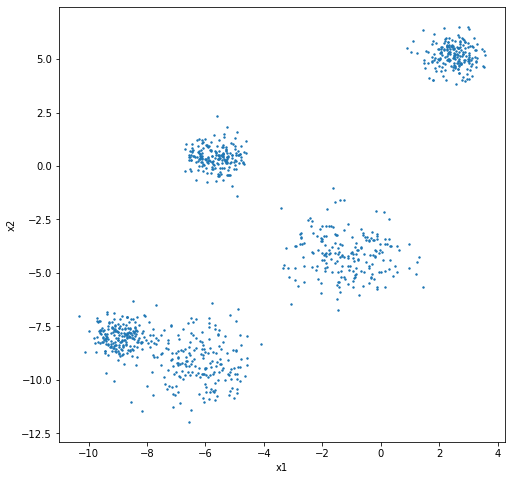

In [ ]:
# Visualización
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Ahora entrenaremos el algoritmo de clustering K-means sobre este dataset:

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 5

In [ ]:
# n_init: Número de veces que se ejecuta el algoritmo con diferentes centroides de inicialización
kmeans = KMeans(n_clusters=k, n_init='auto')

In [ ]:
# Array con la etiqueta del cluster asociado a cada muestra [1, n_samples]
y_pred = kmeans.fit_predict(X)

Ten en cuenta que debe especificar el número de clústeres que se van a encontrar.

In [ ]:
# Ver si son el mismo objeto
y_pred is kmeans.labels_

True

También podemos echar un vistazo a los cinco centroides que encontró el algoritmo:

In [ ]:
kmeans.cluster_centers_

array([[-1.17161354, -4.1410813 ],
       [-8.81568159, -8.00674757],
       [ 2.48186442,  5.17210146],
       [-5.65369888,  0.40123592],
       [-6.08874642, -9.24248636]])

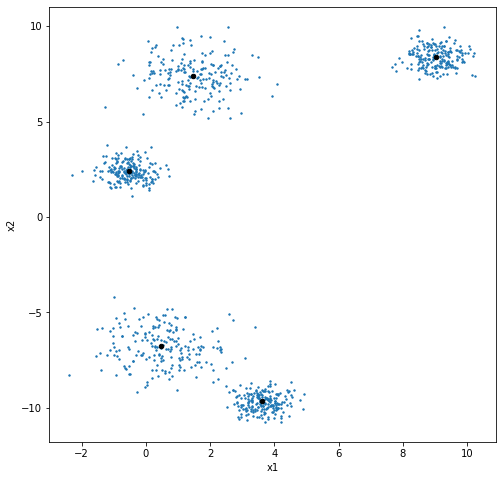

In [ ]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.scatter(centroids[:,0], centroids[:,1], c='k', s=20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Podemos predecir fácilmente los clústers a los cuáles pertenecen un grupo de nuevas instancias:

In [ ]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [ ]:
kmeans.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

Al trazar los límites de decisión del algoritmo, obtenemos una teselación de [Voronoi](https://es.wikipedia.org/wiki/Pol%C3%ADgonos_de_Thiessen):

In [ ]:
# Plotting decision regions
def plot_decision_regions(kmeans, X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 8))
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
  plt.show()

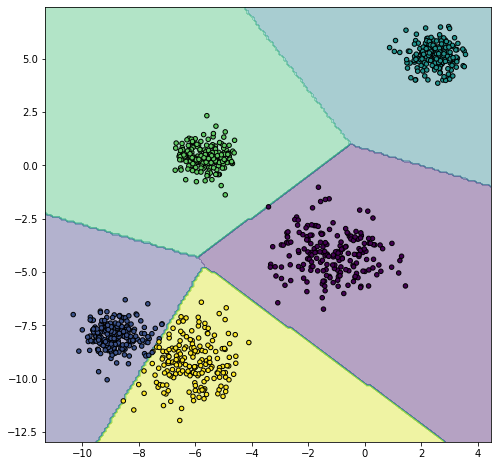

In [ ]:
plot_decision_regions(kmeans,X)

La gran mayoría de las instancias se asignaron claramente a su clúster original.

Lo único que le importa a K-means es la distancia entre las instancias y los centroides. En lugar de asignar cada instancia a un clúster (agrupación dura), es mejor dar una puntuación de clúster por instancia (agrupación suave). La puntuación puede ser la distancia entre la instancia y los centroides (esta también puede ser una buena técnica de reducción de dimensionalidad).

En `sklearn`, el método `transform` mide la distancia entre cada instancia y los centroides.

In [ ]:
kmeans.transform(X_new)

array([[ 6.25184435, 13.33608783,  4.02763934,  5.87540276, 12.78539528],
       [ 7.42396384, 15.48371171,  3.21413941,  8.80014493, 14.45679118],
       [ 7.371434  , 12.44872059,  5.89651272,  3.71425531, 12.62611685],
       [ 6.88817522, 12.00890906,  6.09843945,  3.38333096, 12.1419249 ]])

Visualizamos las nuevas instancias (puntos rojos), los centroides (puntos negros) y las muestras del dataset (puntos azules)

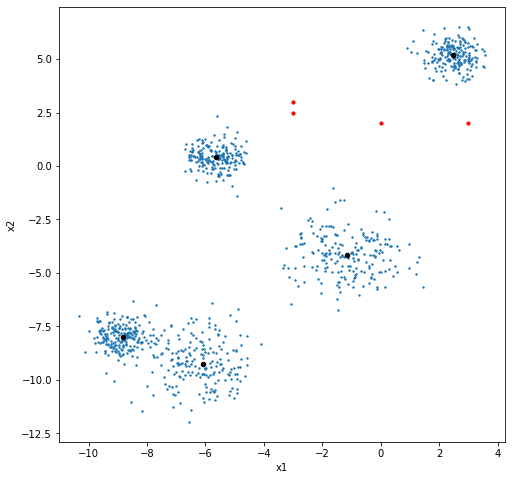

In [ ]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.scatter(centroids[:,0], centroids[:,1], c='k', s=20)
plt.scatter(X_new[:, 0], X_new[:,1], c='r', s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 5.1. Variante con centroides conocidos

Si se sabe aproximadamente dónde deberían estar los centroides, entonces puede inicializar `KMeans` con un parámetro llamado init que los contenga:

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

In [ ]:
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [ ]:
kmeans.fit_predict(X)

array([3, 4, 0, 3, 3, 4, 4, 2, 4, 3, 1, 4, 0, 4, 4, 1, 4, 0, 0, 3, 0, 0,
       1, 0, 1, 2, 1, 0, 0, 0, 4, 2, 2, 4, 4, 0, 4, 0, 3, 3, 3, 0, 2, 0,
       3, 4, 3, 1, 4, 4, 0, 3, 4, 2, 3, 3, 1, 3, 4, 0, 2, 3, 1, 1, 3, 2,
       2, 0, 1, 3, 3, 4, 0, 4, 3, 1, 2, 2, 3, 0, 0, 3, 4, 1, 4, 0, 0, 1,
       1, 2, 1, 3, 3, 0, 0, 0, 2, 4, 1, 1, 1, 2, 4, 1, 4, 1, 2, 3, 2, 3,
       0, 1, 0, 0, 0, 3, 1, 2, 2, 3, 3, 1, 1, 1, 3, 3, 1, 3, 0, 2, 1, 1,
       3, 0, 2, 2, 1, 2, 3, 1, 2, 4, 2, 2, 0, 4, 1, 0, 3, 0, 0, 0, 3, 4,
       0, 1, 1, 3, 4, 2, 2, 1, 1, 3, 4, 3, 2, 2, 0, 2, 3, 2, 4, 1, 4, 3,
       1, 0, 1, 1, 3, 1, 2, 3, 4, 1, 2, 0, 4, 4, 4, 4, 1, 0, 4, 0, 1, 2,
       0, 2, 3, 2, 2, 3, 2, 1, 1, 4, 0, 3, 1, 4, 1, 3, 3, 4, 0, 1, 3, 1,
       2, 0, 0, 1, 2, 3, 3, 0, 1, 3, 2, 1, 2, 1, 4, 4, 3, 1, 0, 0, 3, 3,
       4, 3, 4, 3, 2, 1, 1, 3, 4, 2, 1, 2, 4, 2, 1, 0, 4, 3, 2, 2, 3, 2,
       0, 1, 2, 2, 1, 3, 3, 0, 4, 3, 2, 0, 1, 3, 0, 1, 3, 1, 2, 3, 1, 2,
       0, 2, 1, 4, 1, 0, 0, 3, 1, 2, 4, 2, 2, 1, 4,

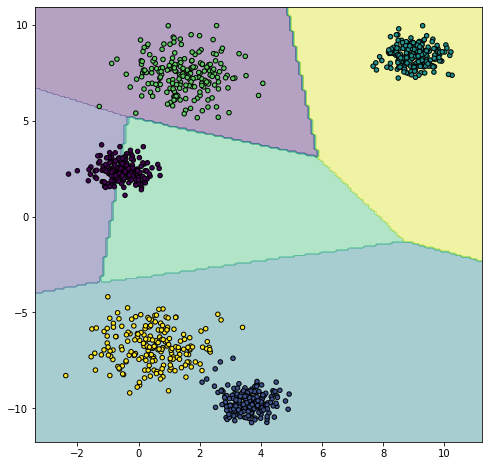

In [ ]:
#plot_decision_regions(kmeans, X)

## 6. ¿Cómo encontrar el número óptimo de clústers?

### 6.1. Método del Elbow

Podríamos estar pensando que podemos elegir el modelo con la inertia más baja. Esto plantea un problema porque aumentar `k` siempre nos dará una menor inertia (o distorsión).

Visualicemos inertia como una función de `k`:

<div style="text-align:center">
    <img style="ancho:50%" src="img/k_to_inretia.png">
</div>

Como podemos ver, la distorsión (o inertia) cae mucho cuando pasamos de $3$ a $4$, pero luego disminuye mucho más lentamente y seguimos aumentando $k$. Esta curva tiene aproximadamente la forma de un brazo y hay un codo en $k=4$. Así que elegimos $4$.

Este método de elegir el número óptimo de clústeres es bastante basto.

Calculémoslo usando `sklearn`:


In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto')
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

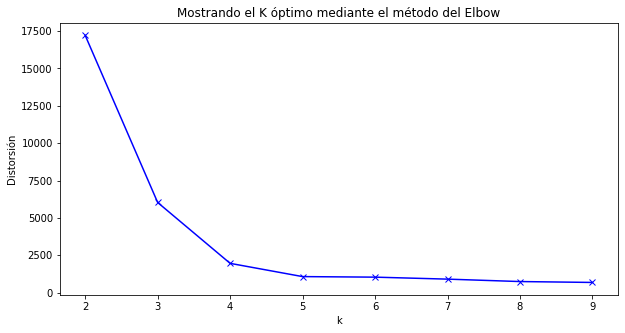

In [ ]:
# Representa gráficamente la evolución de la distorsión en función de K
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

### 6.2. Silhouette Score

Un enfoque más preciso y costoso desde el punto de vista computacional es utilizar el Silhouette Score (o puntuación de silueta), que es el coeficiente de silueta medio de todas las instancias.

El Silhouette Score de una instancia es igual a $\frac{b-a}{max(a,b)} \in [-1,1]$
- $a$: distancia media a otras instancias del mismo clúster.
- $b$: distancia media a instancias en el siguiente clúster más cercano.
Resultado:
- $+1$ significa que la instancia está bien dentro de su propio clúster y lejos de otros clústeres.
- $0$ significa que la instancia se encuentra en el límite entre dos clústeres.
- $-1$ significa que la instancia puede estar en el clúster incorrecto.

El Silhouette Score mide una puntuación de **densidad** de clústeres.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.7237682721668764

Vamos a comparar el silhouette score para diferentes números de clústers:

In [ ]:
scores = list()
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
    del(kmeans)

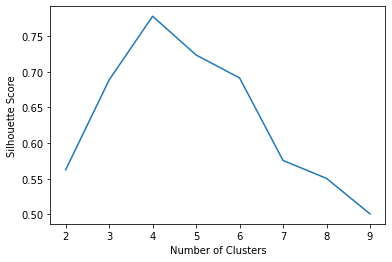

In [ ]:
plt.plot(list(range(2, 10)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Esta es una mejor visualización porque muestra la importancia de una pequeña cantidad de clústeres.

Se obtiene una visualización aún más informativa cuando trazamos el coeficiente de silueta de cada instancia, ordenados por el grupo al que están asignados y el valor del coeficiente. La línea discontinua indica el coeficiente de silueta medio:

<div style="text-align:center">
<img style="width:50%" src="img/silhouette_diagram.png">
</div>

Cuando la mayoría de las instancias en un clúster tienen un coeficiente más bajo que esta puntuación, entonces el clúster es bastante malo, ya que esto significa que sus instancias están demasiado cerca de otros clústeres. En este ejemplo, `4` y `5` se ven bien y parece una buena idea usar $k=5$ para obtener grupos de tamaños similares.

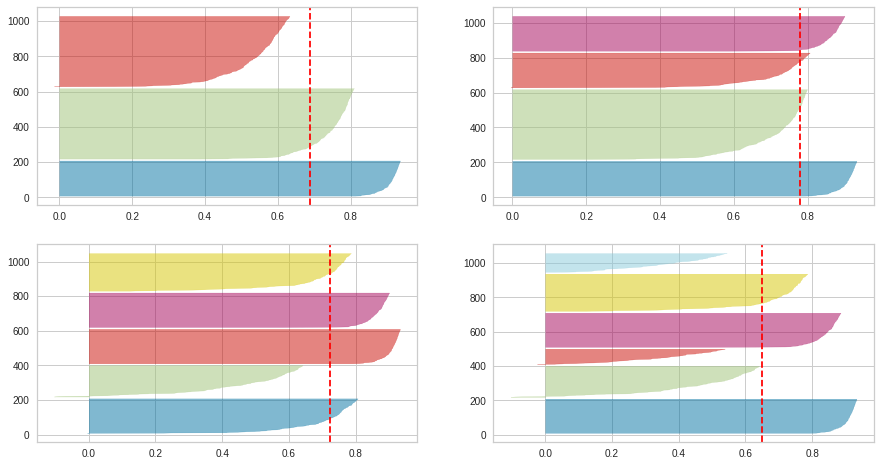

In [ ]:
# from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
%matplotlib inline


# Generamos una vista de los distintos Silhouette score en función de K
# Genera un subplot por cada uno de los clústeres generados
# Genera scores para 3, 4, 5 y 6 Ks

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [3, 4, 5, 6]:
    # Creamos una instancia del modelo K-Means en función del valor de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-1, 2)
    # Creamos una instancia de "SilhouetteVisualizer" con la instancia KMeans anterior
    # Alimentamos el visualizador
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

## 7. Limites de K-means

- `K-means` no es perfecto, por lo que es necesario ejecutar el algoritmo varias veces para evitar soluciones subóptimas.

- Otro factor limitante del algoritmo es que necesitamos especificar el número de clústers.

- `K-means` tampoco se comporta muy bien cuando los grupos tienen diferentes tamaños, diferentes densidades o formas no esféricas.

- Dependiendo de los datos, diferentes algoritmos de clustering pueden funcionar mejor (como `DBSCAN` o `Gaussian Mixtures`).

- Escalar las entradas con un Standard Scaler también es imprescindible con `K-means`.


# Ejercicios

**1. ¿Cuáles son algunas de las principales aplicaciones de los algoritmos de clustering?**

**2. Describe 2 técnicas para seleccionar el número correcto de clústeres al usar K-Means.**


**3. Abre el fichero ClusteringMetrics.ipynb y explica que otros dos métodos adicionales existen para seleccionar el número correcto de clústers. ¿En qué consisten? Busca información al respecto.**

**4. Toma como base el dataset data_Clusters.csv y aplica un algoritmo de clustering a dicho dataset. Responde a las siguientes preguntas:
4.1. ¿Cuál es la media, max, min de cada característica?
4.2. ¿Cuál es la distribución espacial del dataset? Obtén una representación gráfica.
4.3. ¿Cuál es la evolución de la inertia en función de K? Obtén una representación gráfica.
4.4. ¿Cuál es el número óptimo de clusters que obtienes según el método del Elbow y el método del Silhouette Score?
4.5. Una vez obtenido el valor óptimo de K, genera un modelo K-means y entrénalo con los datos anteriores-
4.6. Invéntate diversas predicciones para saber en qué clúster se asigna.**

**5. ¿Qué otros algoritmos de clustering existen al margen del clásico K-means? Busca 2 y descríbelos.**

## 8. INFORMACIÓN EXTRA SOBRE CLUSTERING

### 8.1. Uso de Clustering para Preprocessing

El clustering puede ser una opción eficiente para la llevara cabo una reducción de la dimensionalidad. En particular, como un paso de as a preprocessing antes de un algoritmo de aprendizaje supervisado.

Vamos a mostrar un ejemplo de redución de la dimensionalidad usando clustering con el pequeño dataset digits (1797 imágenes de dígitos de 8x8 pixels):

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1347, 64), (1347,), (450, 64), (450,))

Visualizamos una imgen

<Figure size 432x288 with 0 Axes>

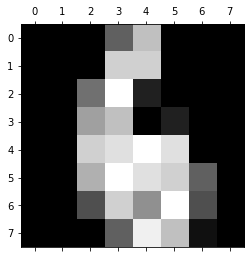

In [ ]:
plt.gray()
image = X_train[0].reshape(8,8)
plt.matshow(image)
plt.show()

Ahora, entrenamos un modelo de regresión logística:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
log_reg.score(X_test, y_test)

0.9511111111111111

Esta es nuestra accuracy de refereancia.

Vamos a crear un pipeline que agrupe en conjunto de entrenamiento en 50 clusters y **sustituya las imágenes por sus distancia a esos 50 clusters**, luego aplicaremos un modelo de regresión logística:

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline(steps=[
    ("kmeans", KMeans(n_clusters=50, n_init='auto')),
    ("log_reg", LogisticRegression(solver='liblinear', multi_class='auto'))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init='auto')),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [ ]:
pipeline.score(X_test, y_test)

0.9755555555555555

Reduciendo la dimensionalidad de los datos de entrada, se consiguió eliminar gran parte del ruido y patrones presentes lo que facilita al Regresor Logístico la identificación de las instancias. En este caso hemos elegido el número de clusters de forma arbitraria, lo cual se podría mejorar.  

Podemos usar 'GridSearchCV' para encontrar el número óptimo de cluster en base al score final para la Regresión Logística:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Vamos a testear un rango para k de 75 a 124
param_dict = dict(kmeans__n_clusters=range(75,125))

In [ ]:
# Usamos validación cruzada con kfold=3
grid_clf = GridSearchCV(pipeline, param_dict, cv=3, verbose=2)

In [ ]:
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..............................kmeans__n_clusters=75; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=75; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=75; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=76; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=76; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=76; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=77; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=77; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=77; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=78; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=78; total time=   0.6s
[CV] END ..............................kmeans__

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init='auto')),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'kmeans__n_clusters': range(75, 125)}, verbose=2)

Obtenemos el valor de k con el que se ha obtenido el mejor resultado (en los datos no utilizados en el entrenamiento)

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 112}

In [ ]:
grid_clf.score(X_test, y_test)

0.9822222222222222

Para **`k=122`**, conseguimos aumentar la accuracy simplemente reduciendo la dimensionalidad del dataset usando clustering no supervisado antes de entrenar un regresor.

### 8.2. Accelerated `K-means` and `Mini-Batch K-means`

Una [mejora importante](https://www.aaaipress.org/Papers/ICML/2003/ICML03-022.pdf) del algoritmo `K-means` evita realizar muchos calculos de la distancia innecesarios lo cuál accelera el algoritmo. La tećnica se basa en la desigualdad del triangular: En todo triángulo, la suma de las longitudes de dos lados cualquiera es siempre mayor a la longitud del lado restante. El algoritmo mantiene un registro de los límites inferior y superior de las distancias entre las instancias y los centroides. Esta mejora también ha sido implementada en `sklearn`.

En otro [trabajo](http://www.ra.ethz.ch/CDstore/www2010/www/p1177.pdf) se propone el uso de mini-batches en lugar de usar todo el dataset para cada iteración. Con esto se consigue **acelerar** el algoritmo en un factor de 3 o 4 veces y permite llevar a cabo el clustering de grandes dataset que no se pueden mantener en memoria.

Vamos a usar en `sklearn`:

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init='auto')

In [ ]:
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init='auto')

Si nuestro dataset no se puede almacenar en memoria, podemos usar `memmap`con el método `partial_fit()'.

La ventaja de usar 'MiniBatchMeans' es considerable cuando elegimos un valor grande de `k` para los clusters. El método Bacthing llega a ser mucho más rápido y el rendimiento se mantiene aproximadamente igual:

<div style="text-align:center">
    <img style="width:50%" src="img/inretia_speed.png">
</div>

# Webgrafia


[Curso de Akramz basado en Aurelien Geron](https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
Curso de la Xunta de Galicia impartido por Alfonso Antolínez
[DataCamp](https://www.datacamp.com/)

# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.